In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

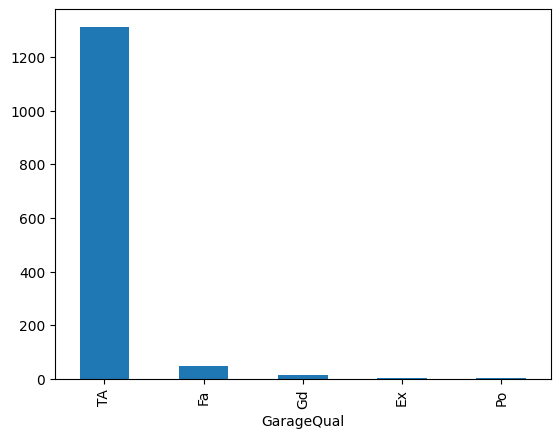

In [10]:
#working on GarageQual where less values are missing
df['GarageQual'].value_counts().plot(kind='bar')

In [11]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

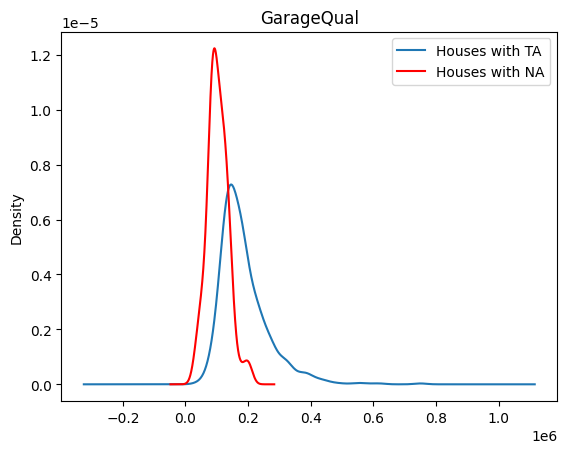

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title("GarageQual")

In [13]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [14]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

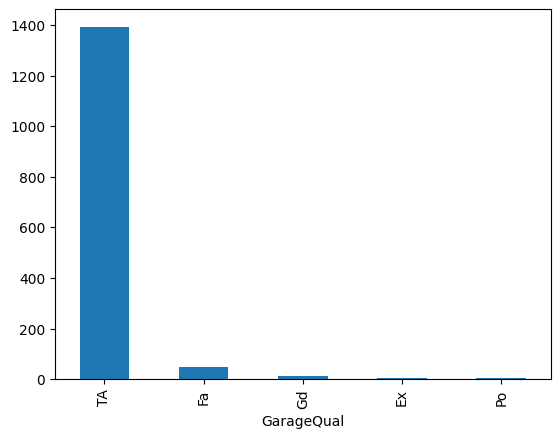

In [15]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

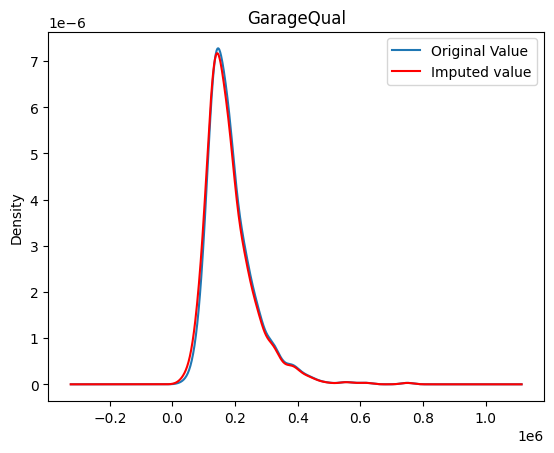

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original Value','Imputed value']
ax.legend(lines,labels,loc='best')

#add title
plt.title("GarageQual")

<Axes: xlabel='FireplaceQu'>

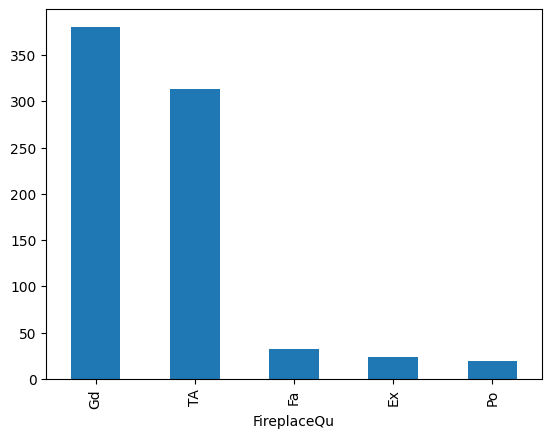

In [17]:
#working on FirePlaceQu in which large percentage of values are missing
df['FireplaceQu'].value_counts().plot(kind='bar')

In [18]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

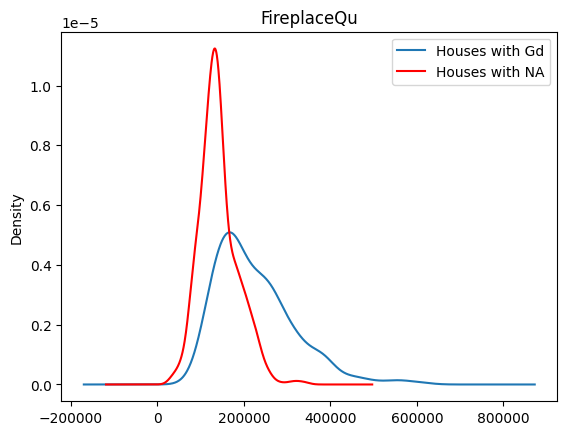

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [23]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [24]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

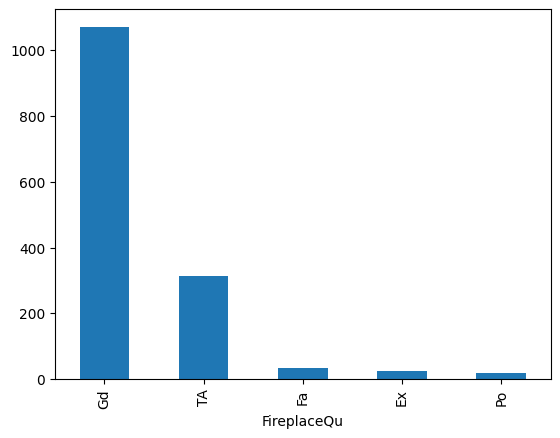

In [25]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FirePlaceQu')

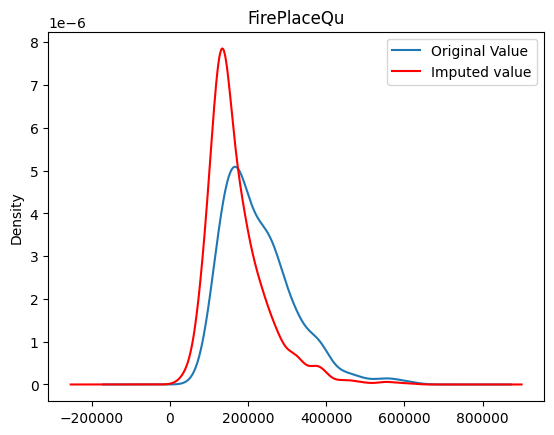

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of variable after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original Value','Imputed value']
ax.legend(lines,labels,loc='best')

#add title
plt.title("FirePlaceQu")

USING SKLEARN

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(strategy='most_frequent')

In [31]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [32]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)